In [1]:
import librosa
import matplotlib.pyplot as plt
from pathlib import Path
# import torch
import torchaudio as ta
import torchaudio.transforms as T
from torchaudio.utils import download_asset
# Project libraries.
import plot_functions as plotting
import utils
import configs

## Test spectrogram settings with tutorial data

In [2]:
graph_path = Path.cwd() / "graphs" / "week6-7_figs"

t_sample = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav") # Tutorial sample sound file.
t_wf, t_sr = ta.load(t_sample)

specgram_config = configs.get_specgram_config()
t_config = specgram_config.copy()
t_config["n_mels"] = 128
t_config["power"] = 2.0
t_config["sample_rate"] = t_sr

t_transf = utils.PipelineSpecgram(specgram_config=t_config)

t_config

{'sample_rate': 16000,
 'n_fft': 1024,
 'win_length': 1024,
 'hop_length': 512,
 'window_fn': <function torch._VariableFunctionsClass.hann_window>,
 'resample_rate': None,
 'n_mels': 128,
 'power': 2.0,
 'center': True,
 'pad_mode': 'reflect',
 'f_min': 0.0,
 'f_max': 32000.0}

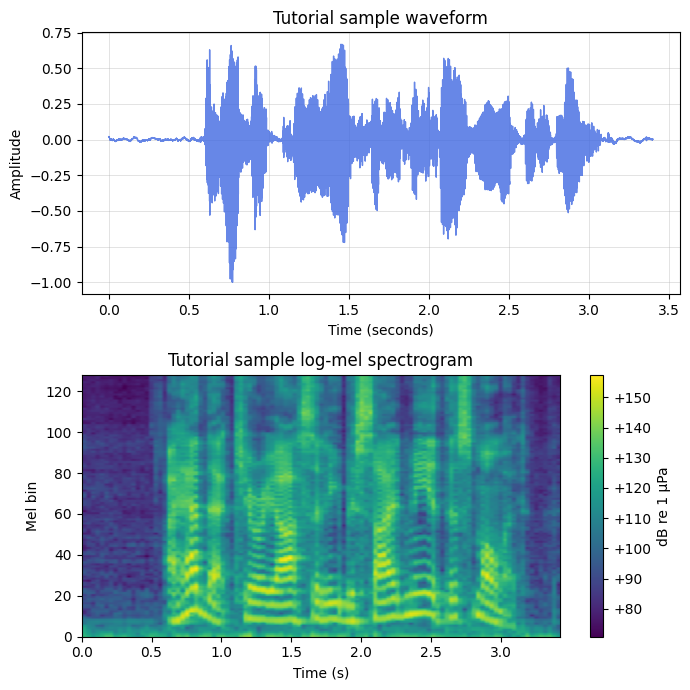

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(7, 7))
plotting.plot_waveform_fast(t_wf, t_sr, ax=axs[0], title="Tutorial sample waveform")
t_feats = t_transf(t_wf)
plotting.plot_features(t_feats, t_transf, t_config, ax=axs[1], title="Tutorial sample log-mel spectrogram", unit="bins")
plt.tight_layout()

plt.savefig(graph_path / "tutorial_test_spectrogram.png", dpi=300)

Plotter from tutorial:
https://docs.pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py

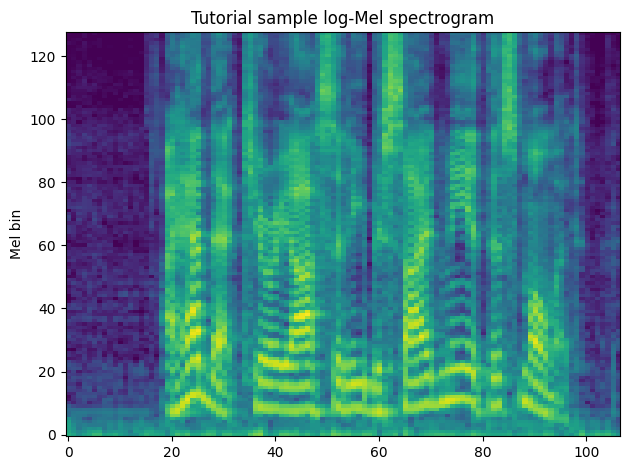

In [4]:
# Plotter from tutorial.
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

mel_spectrogram = T.MelSpectrogram(sample_rate=t_config["sample_rate"], n_fft=t_config["n_fft"],
                                 hop_length=t_config["hop_length"], n_mels=t_config["n_mels"], power=t_config["power"])

t_spec = mel_spectrogram(t_wf)
plot_spectrogram(t_spec[0], title="Tutorial sample log-Mel spectrogram", ylabel="Mel bin")
plt.tight_layout()

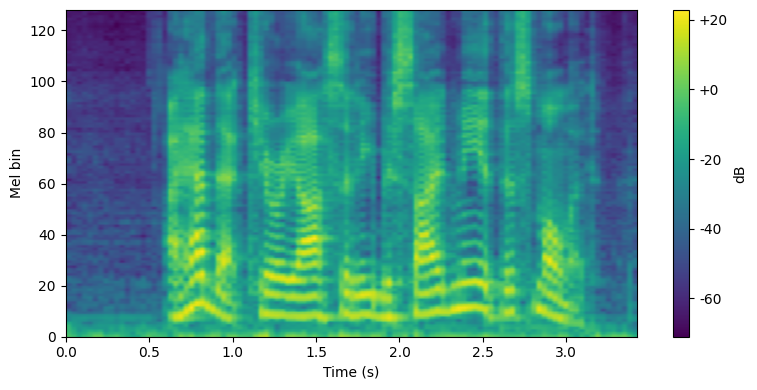

In [6]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=t_sr,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(t_wf)
to_db = T.AmplitudeToDB(stype="power")
melspec_db = to_db(melspec)                 # [1, n_mels, T]

fig, ax = plt.subplots(figsize=(8,4))
img = ax.imshow(
    melspec_db[0].cpu().numpy(),
    origin="lower", aspect="auto",
    extent=[0, melspec_db.shape[-1]*hop_length/t_sr, 0, n_mels]
)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Mel bin")
cbar = fig.colorbar(img, ax=ax, format="%+2.0f")
cbar.set_label("dB")                        # or "dB re 1 µPa" if you scaled to that ref
plt.tight_layout()
plt.show()

In [ ]:
t_feats[0, 0, :]

tensor([127.9186, 124.5318, 118.0643, 123.1523, 126.0621, 131.6262, 131.2883,
        123.2028, 125.2658, 127.7199, 122.9258, 119.0788, 115.0853, 117.6830,
        124.3970, 129.5524, 126.3042, 125.4065, 124.0898, 115.9897, 125.8696,
        133.6414, 129.8875, 133.5440, 124.7509, 125.6014, 130.4938, 133.1574,
        131.4489, 122.7280, 131.5821, 132.1036, 127.1071, 126.6195, 125.5082,
        135.5951, 140.8497, 142.7581, 127.2977, 121.2554, 125.3564, 135.1409,
        135.8412, 133.3371, 132.3812, 127.1935, 130.8185, 124.7260, 122.1273,
        132.0472, 129.9430, 139.2597, 137.0380, 133.4202, 134.2953, 128.4320,
        128.6326, 133.9962, 132.8996, 127.5130, 115.9056, 127.1946, 127.0223,
        132.0802, 118.4053, 135.1770, 127.1710, 119.9526, 126.2921, 129.0820,
        130.0861, 132.0544, 132.1468, 130.5515, 130.8502, 126.5074, 126.8263,
        128.7516, 134.5057, 130.3286, 128.2610, 125.6514, 124.7984, 124.6922,
        125.7642, 127.4062, 120.1813, 123.8964, 124.4760, 128.76

In [ ]:
t_spec[0, 0, :]

tensor([  6.1925,   2.8391,   0.6404,   2.0665,   4.0384,  14.5418,  13.4533,
          2.0906,   3.3618,   5.9155,   1.9614,   0.8089,   0.3225,   0.5865,
          2.7523,   9.0207,   4.2700,   3.4725,   2.5644,   0.3972,   3.8633,
         23.1280,   9.7442,  22.6150,   2.9860,   3.6320,  11.2042,  20.6892,
         13.9603,   1.8741,  14.3950,  16.2316,   5.1370,   4.5915,   3.5548,
         36.2667, 121.6096, 188.7150,   5.3674,   1.3352,   3.4328,  32.6658,
         38.3815,  21.5628,  17.3029,   5.2402,  12.0739,   2.9690,   1.6320,
         16.0223,   9.8696,  84.3278,  50.5590,  21.9797,  26.8860,   6.9695,
          7.2989,  25.0968,  19.4967,   5.6403,   0.3895,   5.2416,   5.0377,
         16.1443,   0.6927,  32.9381,   5.2131,   0.9891,   4.2581,   8.0947,
         10.2002,  16.0488,  16.3939,  11.3542,  12.1624,   4.4745,   4.8154,
          7.5017,  28.2210,  10.7859,   6.7003,   3.6740,   3.0189,   2.9459,
          3.7707,   5.5033,   1.0426,   2.4527,   2.8028,   7.52

In [ ]:
librosa.power_to_db(t_spec)[0, 0, :]

array([ 7.9186373 ,  4.5317593 , -1.9356788 ,  3.1522794 ,  6.062086  ,
       11.626167  , 11.288304  ,  3.2027545 ,  5.265758  ,  7.719919  ,
        2.925762  , -0.92120403, -4.914752  , -2.316991  ,  4.3969975 ,
        9.552414  ,  6.3042374 ,  5.4064555 ,  4.0898128 , -4.0103245 ,
        5.869553  , 13.641381  ,  9.887478  , 13.543974  ,  4.75095   ,
        5.601447  , 10.493811  , 13.157446  , 11.448948  ,  2.7280364 ,
       11.582129  , 12.103619  ,  7.1070538 ,  6.6195087 ,  5.5082083 ,
       15.5950775 , 20.849676  , 22.758064  ,  7.297658  ,  1.2553619 ,
        5.3564496 , 15.140932  , 15.841226  , 13.337057  , 12.381199  ,
        7.193512  , 10.818471  ,  4.7260394 ,  2.127306  , 12.047243  ,
        9.943007  , 19.259708  , 17.037985  , 13.42022   , 14.295261  ,
        8.432008  ,  8.632554  , 13.996186  , 12.899616  ,  7.5130367 ,
       -4.094407  ,  7.194618  ,  7.022338  , 12.080194  , -1.5947045 ,
       15.176987  ,  7.1709676 , -0.04743163,  6.292119  ,  9.08